In [1]:
import pandas as pd
from google.cloud import bigquery
from IPython.display import display
from IPython.display import Markdown

import matplotlib.pyplot as plt
import seaborn as sns

### Import function: Interactive SQL Query to Pandas DataFrame Converter

In [2]:
# Import the custom query_df function for executing BigQuery queries
from query_functions import query_df

### Datasets and Tables

In [37]:
# Catalonian mobile coverage (2015-2017)
mobile_data_cleaned = "bq-analyst-230590.project_cat_mobile_coverage_2015_2017.mobile_data_2015_2017_cleaned"

# Per capita income by catalan province (2015-2017)
percapita_income = "bq-analyst-230590.project_cat_mobile_coverage_2015_2017.cat_percapita_income_by_province_2015_2017"

# Catalan population and density by province (2015-2017)
pop_density = "bq-analyst-230590.project_cat_mobile_coverage_2015_2017.cat_pop_by_province_2015_2017"

### Preview datasets

In [4]:
# SQL query: preview mobile coverage data
query = f"""
    SELECT *
    FROM `{mobile_data_cleaned}`
    LIMIT 100
    """
# DataFrame name
df_name = "mob_cov_data"

# Execute the query and store the result in the DataFrame
query_df(query, df_name)

Query: 


    SELECT *
    FROM `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.mobile_data_2015_2017_cleaned`
    LIMIT 100
    


Dataframe: **mob_cov_data**

,date,hour,lat,long,signal,network,operator,status,description,net,...,precission,provider,activity,postal_code,town_name,position_geom,province,year,month,hour_24h
0,2015-09-08,23:25:32,41.71083,2.73075,19,EE,EE,2,STATE_EMERGENCY_ONLY,2G,...,7.0,GPS,IN_VEHICLE,082845,Tordera,POINT(2.73075 41.71083),Barcelona,2015,9,23
1,2015-09-08,20:26:38,41.67594,2.79930,15,EE,EE,2,STATE_EMERGENCY_ONLY,4G,...,9.0,GPS,ON_FOOT,170237,Blanes,POINT(2.7993 41.67594),Girona,2015,9,20
2,2015-09-08,22:13:38,41.67606,2.79816,15,EE,EE,2,STATE_EMERGENCY_ONLY,4G,...,24.0,GPS,STILL,170237,Blanes,POINT(2.79816 41.67606),Girona,2015,9,22
3,2015-09-08,13:32:01,41.85705,2.77446,8,EE,EE,2,STATE_EMERGENCY_ONLY,3G,...,39.0,GPS,IN_VEHICLE,170335,Caldes de Malavella,POINT(2.77446 41.85705),Girona,2015,9,13
4,2015-09-08,09:19:39,41.99130,2.79364,15,EE,EE,2,STATE_EMERGENCY_ONLY,4G,...,6.0,GPS,IN_VEHICLE,170792,Girona,POINT(2.79364 41.9913),Girona,2015,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2015-10-27,11:12:43,41.38228,2.16105,20,Movistar,ONO,2,STATE_EMERGENCY_ONLY,3G,...,47.0,GPS,ON_FOOT,080193,Barcelona,POINT(2.16105 41.38228),Barcelona,2015,10,11
96,2015-10-01,17:54:51,41.39992,2.16361,28,Movistar,ONO,2,STATE_EMERGENCY_ONLY,3G,...,11.0,GPS,ON_BICYCLE,080193,Barcelona,POINT(2.16361 41.39992),Barcelona,2015,10,17
97,2015-03-27,17:28:24,41.44699,2.18768,14,Movistar,ONO,2,STATE_EMERGENCY_ONLY,3G,...,24.0,GPS,IN_VEHICLE,080193,Barcelona,POINT(2.18768 41.44699),Barcelona,2015,3,17
98,2015-09-01,07:37:08,41.38207,2.16110,23,Movistar,ONO,2,STATE_EMERGENCY_ONLY,3G,...,22.0,GPS,ON_FOOT,080193,Barcelona,POINT(2.1611 41.38207),Barcelona,2015,9,7


In [5]:
mobdata = query_df(query, df_name)
mobdata.columns

Query: 


    SELECT *
    FROM `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.mobile_data_2015_2017_cleaned`
    LIMIT 100
    


Dataframe: **mob_cov_data**

Index(['date', 'hour', 'lat', 'long', 'signal', 'network', 'operator',
       'status', 'description', 'net', 'speed', 'satellites', 'precission',
       'provider', 'activity', 'postal_code', 'town_name', 'position_geom',
       'province', 'year', 'month', 'hour_24h'],
      dtype='object')

In [6]:
# SQL query: count total rows
query = f"""
    SELECT COUNT(*) total_rows
    FROM `{mobile_data_cleaned}`
    """
# DataFrame name
df_name = "count_data"

# Execute the query and store the result in the DataFrame
query_df(query, df_name)

Query: 


    SELECT COUNT(*) total_rows
    FROM `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.mobile_data_2015_2017_cleaned`
    


Dataframe: **count_data**

,total_rows
0,10643906


In [38]:
# SQL query: preview per capita income by province data
query = f"""
    SELECT *
    FROM `{percapita_income}`
    LIMIT 100
    """
# DataFrame name
df_name = "percapita_income"

# Execute the query and store the result in the DataFrame
query_df(query, df_name)

Query: 


    SELECT *
    FROM `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.cat_percapita_income_by_province_2015_2017`
    LIMIT 100
    


Dataframe: **percapita_income**

,year,province,per_capita_income
0,2015,Girona,25200
1,2015,Lleida,20136
2,2015,Tarragona,22486
3,2015,Barcelona,27214
4,2016,Barcelona,27913
5,2016,Girona,25598
6,2016,Tarragona,23130
7,2016,Lleida,20713
8,2017,Barcelona,28481
9,2017,Lleida,21091


In [49]:
# SQL query: preview population and density by province data
query = f"""
    SELECT *
    FROM `{pop_density}`
    LIMIT 100
    """
# DataFrame name
df_name = "population_density"

# Execute the query and store the result in the DataFrame
query_df(query, df_name)

Query: 


    SELECT *
    FROM `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.cat_pop_by_province_2015_2017`
    LIMIT 100
    


Dataframe: **population_density**

,province,year,population,sq_km,density_per_sq_km
0,Girona,2017,766705,5908,129.8
1,Girona,2016,766273,5908,129.7
2,Girona,2015,765783,5908,129.6
3,Barcelona,2016,5635085,7726,729.4
4,Barcelona,2015,5618162,7726,727.2
5,Barcelona,2017,5652301,7726,731.6
6,Lleida,2017,741884,12172,61.0
7,Lleida,2016,742099,12172,61.0
8,Lleida,2015,742138,12172,61.0
9,Tarragona,2015,811089,6303,128.7


### Execute queries: Exploratory Data Analysis (EDA)

1. Retrieve all records from the "mobile 2015_2017" table for the year 2016 where the signal strength is above a threshold of 80.

2. Calculate the average signal strength (signal) for each month in the year 2017 and order the results in descending order.

3. Find the province with the best 4G network coverage (highest number of records with '4G' in the network column) in the year 2015.

4. Calculate the percentage of records where the status is 'connected' in the "mobile 2015_2017" table for the year 2017.

5. Find the province with the highest average speed (speed) of mobile data in the year 2017.

1. Calculate the average signal strength (signal) for each province in the year 2016. Join this data with the "population by province" table to find the population density for each province in 2016.

2. Find the province with the highest average signal strength (signal) in the year 2017. Then, join this result with the "income per capita by province" table to get the per capita income for that province in 2017.

3. Calculate the correlation coefficient between the average signal strength (signal) and population density in the year 2016 for all provinces.

4. Calculate the correlation coefficient between the average signal strength (signal) and per capita income for all provinces in the year 2017.

5. Group the data in the "mobile 2015_2017" table by network type (e.g., 2G, 3G, 4G) and calculate the average signal strength for each type. Join this data with the "income per capita by province" table to compare the per capita income by network type in the year 2017.


Certainly, here are the 10 SQL interview questions without the quotes:

1. Basic SQL Select:
   - Write a SQL query to retrieve all records from the 'mobile 2015_2017' table.

2. Filtering and Sorting:
   - Retrieve records from the 'mobile 2015_2017' table for the year 2016 and sort them in descending order based on the 'signal' column.

3. Aggregation:
   - Calculate the average 'speed' of mobile data in the 'mobile 2015_2017' table for the year 2017.

4. Join Operations:
   - Join the 'mobile 2015_2017' table with the 'population by province' table to retrieve records from both tables for the year 2016.

5. Subqueries:
   - Write a SQL subquery to find the provinces in the 'population by province' table where the population in 2016 is higher than the average population for all provinces.

6. Grouping and Aggregation:
   - Group the 'mobile 2015_2017' table by 'network' type and calculate the average 'signal' strength and the maximum 'speed' for each network type in the year 2017.

7. Data Transformation:
   - Update the 'status' column in the 'mobile 2015_2017' table, setting it to 'disconnected' for records where 'signal' is less than 50.

8. Complex Filtering:
   - Retrieve records from the 'mobile 2015_2017' table for the year 2017 where 'network' is '4G,' 'status' is 'connected,' and 'speed' is greater than 10.

9. Data Validation:
   - Identify and list all records in the 'mobile 2015_2017' table with missing values in the 'provider' column.

10. Performance Optimization:
    - Discuss possible ways to optimize the performance of a complex SQL query that involves multiple joins and aggregation on the 'mobile 2015_2017' and 'population by province' tables, especially if the query is running slowly.

2. Filtering and Sorting:
   - Retrieve records from the 'mobile 2015_2017' table for the year 2016 and sort them in descending order based on the 'signal' column.

In [44]:
# Datasets: {mobile_data_cleaned}, {pop_density}, {percapita_income}

query = f"""
    SELECT *
    FROM `{mobile_data_cleaned}`
    WHERE year = 2016
    ORDER BY signal DESC
    LIMIT 1000
    """
# DataFrame name
df_name = "mob_data_2016"

# Execute the query and store the result in the DataFrame
query_df(query, df_name)    

Query: 


    SELECT *
    FROM `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.mobile_data_2015_2017_cleaned`
    WHERE year = 2016
    ORDER BY signal DESC
    LIMIT 1000
    


Dataframe: **mob_data_2016**

,date,hour,lat,long,signal,network,operator,status,description,net,...,precission,provider,activity,postal_code,town_name,position_geom,province,year,month,hour_24h
0,2016-09-30,18:28:15,41.45074,2.18854,99,Movistar,Movistar,2,STATE_EMERGENCY_ONLY,3G,...,17.0,GPS,IN_VEHICLE,080193,Barcelona,POINT(2.18854 41.45074),Barcelona,2016,9,18
1,2016-06-22,22:06:43,41.46159,2.17073,99,Orange,Jazztel,2,STATE_EMERGENCY_ONLY,3G,...,12.0,GPS,STILL,080193,Barcelona,POINT(2.17073 41.46159),Barcelona,2016,6,22
2,2016-10-05,20:16:29,41.41717,2.21349,99,Movistar,Movistar,2,STATE_EMERGENCY_ONLY,3G,...,8.0,GPS,IN_VEHICLE,080193,Barcelona,POINT(2.21349 41.41717),Barcelona,2016,10,20
3,2016-10-01,15:28:40,41.53609,2.08220,99,Movistar,Movistar,2,STATE_EMERGENCY_ONLY,2G,...,13.0,GPS,STILL,082384,Sant Quirze del Vallès,POINT(2.0822 41.53609),Barcelona,2016,10,15
4,2016-09-30,18:50:43,41.42698,2.22696,99,Movistar,Movistar,2,STATE_EMERGENCY_ONLY,2G,...,18.0,GPS,TILTING,081944,Sant Adrià de Besòs,POINT(2.22696 41.42698),Barcelona,2016,9,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2016-09-28,18:55:17,41.44715,2.18903,99,Movistar,Movistar,2,STATE_EMERGENCY_ONLY,3G,...,20.0,GPS,IN_VEHICLE,080193,Barcelona,POINT(2.18903 41.44715),Barcelona,2016,9,18
996,2016-10-05,19:35:28,41.43449,2.18351,99,Movistar,Movistar,2,STATE_EMERGENCY_ONLY,2G,...,13.0,GPS,IN_VEHICLE,080193,Barcelona,POINT(2.18351 41.43449),Barcelona,2016,10,19
997,2016-09-30,17:36:41,41.46220,2.17078,99,Movistar,Movistar,2,STATE_EMERGENCY_ONLY,2G,...,7.0,GPS,TILTING,081252,Montcada i Reixac,POINT(2.17078 41.4622),Barcelona,2016,9,17
998,2016-10-05,13:42:43,41.40514,2.19042,99,Movistar,Movistar,2,STATE_EMERGENCY_ONLY,2G,...,12.0,GPS,TILTING,080193,Barcelona,POINT(2.19042 41.40514),Barcelona,2016,10,13


3. Aggregation:
   - Calculate the average 'speed' of mobile data in the 'mobile 2015_2017' table for the year 2017.

In [47]:
# Datasets: {mobile_data_cleaned}, {pop_density}, {percapita_income}

query = f"""
    SELECT 
        ROUND(AVG(speed),2) avg_speed_2017,
        MAX(speed) max_speed_2017,
        ROUND(STDDEV_POP(speed),2) std_speed_2017
    FROM `{mobile_data_cleaned}`
    WHERE year = 2017
    """
# DataFrame name
df_name = "metrics_speed_2017"

# Execute the query and store the result in the DataFrame
query_df(query, df_name)    

Query: 


    SELECT 
        ROUND(AVG(speed),2) avg_speed_2017,
        MAX(speed) max_speed_2017,
        ROUND(STDDEV_POP(speed),2) std_speed_2017
    FROM `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.mobile_data_2015_2017_cleaned`
    WHERE year = 2017
    


Dataframe: **metrics_speed_2017**

,avg_speed_2017,max_speed_2017,std_speed_2017
0,25.18,254.9,34.43


4. Join Operations:
   - Join the 'mobile data cleaned' table with the 'pop density' table to retrieve records from both tables for the year 2016 and extract the population density per square kilometer and the average signal strength for each province.

In [58]:
# Datasets: {mobile_data_cleaned}, {pop_density}, {percapita_income}

query = f"""
    SELECT 
      m.province,
      p.sq_km,
      p.population,
      p.density_per_sq_km,
      ROUND(AVG(m.signal),2) avg_signal
    FROM `{mobile_data_cleaned}` m
    JOIN `{pop_density}` p 
      ON m.province = p.province AND m.year = p.year
    WHERE m.year = 2016
    GROUP BY m.province, p.sq_km, p.population, p.density_per_sq_km
    ORDER BY p.density_per_sq_km DESC;
    """
# DataFrame name
df_name = "joined_pop_mob"

# Execute the query and store the result in the DataFrame
query_df(query, df_name)    

Query: 


    SELECT 
      m.province,
      p.sq_km,
      p.population,
      p.density_per_sq_km,
      ROUND(AVG(m.signal),2) avg_signal
    FROM `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.mobile_data_2015_2017_cleaned` m
    JOIN `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.cat_pop_by_province_2015_2017` p 
      ON m.province = p.province AND m.year = p.year
    WHERE m.year = 2016
    GROUP BY m.province, p.sq_km, p.population, p.density_per_sq_km
    ORDER BY p.density_per_sq_km DESC;
    


Dataframe: **joined_pop_mob**

,province,sq_km,population,density_per_sq_km,avg_signal
0,Barcelona,7726,5635085,729.4,13.38
1,Girona,5908,766273,129.7,11.94
2,Tarragona,6303,810947,128.7,12.70
3,Lleida,12172,742099,61.0,12.83


5. Subqueries:
   - Write a SQL subquery to find the provinces in the 'pop density' table where the population in 2016 is higher than the average population for all provinces.

In [62]:
# Datasets: {mobile_data_cleaned}, {pop_density}, {percapita_income}

query = f"""
    SELECT
      province,
      population
    FROM `{pop_density}`
    WHERE
      year = 2016
      AND population > (
        SELECT AVG(population)
        FROM `{pop_density}`
      );
    """
# DataFrame name
df_name = "pop_2016_greater_t_avg_pop"

# Execute the query and store the result in the DataFrame
query_df(query, df_name)    

Query: 


    SELECT
      province,
      population
    FROM `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.cat_pop_by_province_2015_2017`
    WHERE
      year = 2016
      AND population > (
        SELECT AVG(population)
        FROM `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.cat_pop_by_province_2015_2017`
      );
    


Dataframe: **pop_2016_greater_t_avg_pop**

,province,population
0,Barcelona,5635085


6. Grouping and Aggregation:
   - Group the 'mobile 2015_2017' table by 'network' type and calculate the average 'signal' strength and the maximum 'speed' for each network type in the year 2017.

In [63]:
# Datasets: {mobile_data_cleaned}, {pop_density}, {percapita_income}

query = f"""
    SELECT
      net,
      ROUND(AVG(signal),2) avg_signal,
      MAX(speed) max_speed
    FROM `{mobile_data_cleaned}`
    WHERE
      year = 2017
    GROUP BY 1;
    """
# DataFrame name
df_name = "net_avg_sign_and_max_speed_2017"

# Execute the query and store the result in the DataFrame
query_df(query, df_name)    

Query: 


    SELECT
      net,
      ROUND(AVG(signal),2) avg_signal,
      MAX(speed) max_speed
    FROM `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.mobile_data_2015_2017_cleaned`
    WHERE
      year = 2017
    GROUP BY 1;
    


Dataframe: **net_avg_sign_and_max_speed_2017**

,net,avg_signal,max_speed
0,3G,13.38,254.9
1,4G,12.69,254.8
2,2G,12.46,254.7
3,Undefined net,12.14,254.1


8. Complex Filtering:
   - Retrieve records from the 'mobile 2015_2017' table for the year 2017 where 'net' is '4G,' 'description' is 'STATE_IN_SERVICE,' and 'speed' is greater than 100.

In [73]:
# Datasets: {mobile_data_cleaned}, {pop_density}, {percapita_income}

query = f"""
    SELECT
      date,
      operator,
      net,
      description,
      signal,
      speed
    FROM `{mobile_data_cleaned}`
    WHERE
      year = 2017
      AND net = '4G'
      AND description = 'STATE_IN_SERVICE'
      AND speed > 100.0
    ORDER BY 6 DESC
    LIMIT 1000;
    """
# DataFrame name
df_name = "filtered_data"

# Execute the query and store the result in the DataFrame
query_df(query, df_name)    

Query: 


    SELECT
      date,
      operator,
      net,
      description,
      signal,
      speed
    FROM `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.mobile_data_2015_2017_cleaned`
    WHERE
      year = 2017
      AND net = '4G'
      AND description = 'STATE_IN_SERVICE'
      AND speed > 100.0
    ORDER BY 6 DESC
    LIMIT 1000;
    


Dataframe: **filtered_data**

,date,operator,net,description,signal,speed
0,2017-07-24,Movistar,4G,STATE_IN_SERVICE,26,253.1
1,2017-05-28,Vodafone,4G,STATE_IN_SERVICE,23,244.6
2,2017-02-22,Orange,4G,STATE_IN_SERVICE,14,242.6
3,2017-03-31,Orange,4G,STATE_IN_SERVICE,19,239.6
4,2017-05-10,Masmovil,4G,STATE_IN_SERVICE,13,229.5
...,...,...,...,...,...,...
570,2017-05-14,Vodafone,4G,STATE_IN_SERVICE,7,100.3
571,2017-07-15,Vodafone,4G,STATE_IN_SERVICE,9,100.3
572,2017-05-05,Orange,4G,STATE_IN_SERVICE,11,100.3
573,2017-07-25,Orange,4G,STATE_IN_SERVICE,12,100.2


9. Data Validation:
   - Identify and list all records in the 'mobile 2015_2017' table with missing values in the 'provider' column.

In [74]:
# Datasets: {mobile_data_cleaned}, {pop_density}, {percapita_income}

query = f"""
    SELECT
      *
    FROM `{mobile_data_cleaned}`
    WHERE
      provider IS NULL
    LIMIT 1000;
    """
# DataFrame name
df_name = "null_provider"

# Execute the query and store the result in the DataFrame
query_df(query, df_name)    

Query: 


    SELECT
      *
    FROM `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.mobile_data_2015_2017_cleaned`
    WHERE
      provider IS NULL
    LIMIT 1000;
    


Dataframe: **null_provider**

,date,hour,lat,long,signal,network,operator,status,description,net,...,precission,provider,activity,postal_code,town_name,position_geom,province,year,month,hour_24h


10. Multiple Join:

    - Join the 'mobile_2015_2017' table with the 'pop_density' and 'percapita_income' tables to create a unified dataset. The result should include information about mobile coverage, income per capita, and population density for each province in the year 2016. Perform a triple join to combine the data from these three tables into a single result set.

In [84]:
# Datasets: {mobile_data_cleaned}, {pop_density}, {percapita_income}

query = f"""
    SELECT
      m.province,
      m.year,
      ROUND(AVG(m.signal),2) avg_signal,
      ROUND(MAX(m.speed),2) max_speed,
      p.per_capita_income,
      d.density_per_sq_km pop_density_sq_km
    FROM `{mobile_data_cleaned}` m
    JOIN `{percapita_income}` p
        ON m.province = p.province
        AND m.year = p.year
    JOIN `{pop_density}` d
        ON m.province = d.province
        AND m.year = d.year
    GROUP BY 1,2,5,6
    ORDER BY 1,2 DESC;
    """
# DataFrame name
df_name = "triple_join_data"

# Execute the query and store the result in the DataFrame
query_df(query, df_name)    

Query: 


    SELECT
      m.province,
      m.year,
      ROUND(AVG(m.signal),2) avg_signal,
      ROUND(MAX(m.speed),2) max_speed,
      p.per_capita_income,
      d.density_per_sq_km pop_density_sq_km
    FROM `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.mobile_data_2015_2017_cleaned` m
    JOIN `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.cat_percapita_income_by_province_2015_2017` p
        ON m.province = p.province
        AND m.year = p.year
    JOIN `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.cat_pop_by_province_2015_2017` d
        ON m.province = d.province
        AND m.year = d.year
    GROUP BY 1,2,5,6
    ORDER BY 1,2 DESC;
    


Dataframe: **triple_join_data**

,province,year,avg_signal,max_speed,per_capita_income,pop_density_sq_km
0,Barcelona,2017,12.86,254.8,28481,731.6
1,Barcelona,2016,13.38,255.0,27913,729.4
2,Barcelona,2015,14.21,255.0,27214,727.2
3,Girona,2017,11.92,253.9,25992,129.8
4,Girona,2016,11.94,255.0,25598,129.7
5,Girona,2015,12.18,254.9,25200,129.6
6,Lleida,2017,11.81,254.9,21091,61.0
7,Lleida,2016,12.83,254.6,20713,61.0
8,Lleida,2015,12.49,254.8,20136,61.0
9,Tarragona,2017,12.96,254.9,23534,128.6


11. Different Joins and Count with NULL Values:

    - In the pop_density table, add a couple of rows with NULL values for the province column to simulate missing data. Then, perform the following join operations with the mobile_2015_2017 table:

In [96]:
# Datasets: {mobile_data_cleaned}, {pop_density}, {percapita_income}

# pop_density columns: province, year, population, sq_km, density_per_sq_km

query = f"""
    INSERT INTO `{pop_density}`(year, population, sq_km)
    VALUES 
        (2015, 600000, 500),
        (2014, 530000, 490),
        (2016, 420000, 400),
        (2017, 385000, 380);
    
    INSERT INTO `{pop_density}`(province, year, sq_km)
    VALUES
        ('Costa Brava', 2017, 678),
        ('Pirineus', 2015, 10000)
    """
# DataFrame name
df_name = "added_null_province_rows"

# Execute the query and store the result in the DataFrame
query_df(query, df_name)    

Query: 


    INSERT INTO `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.cat_pop_by_province_2015_2017`(year, population, sq_km)
    VALUES 
        (2015, 600000, 500),
        (2014, 530000, 490),
        (2016, 420000, 400),
        (2017, 385000, 380);
    
    INSERT INTO `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.cat_pop_by_province_2015_2017`(province, year, sq_km)
    VALUES
        ('Costa Brava', 2017, 678),
        ('Pirineus', 2015, 10000)
    


Dataframe: **added_null_province_rows**

""


In [97]:
# Check updated pop_density dataset

query = f"""
    SELECT *
    FROM `{pop_density}`
    """
# DataFrame name
df_name = "pop_density_with_nulls"

# Execute the query and store the result in the DataFrame
query_df(query, df_name)    

Query: 


    SELECT *
    FROM `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.cat_pop_by_province_2015_2017`
    


Dataframe: **pop_density_with_nulls**

,province,year,population,sq_km,density_per_sq_km
0,None,2015,600000.0,500,NaN
1,None,2016,420000.0,400,NaN
2,None,2017,385000.0,380,NaN
3,None,2014,530000.0,490,NaN
4,Girona,2017,766705.0,5908,129.8
5,Girona,2016,766273.0,5908,129.7
6,Girona,2015,765783.0,5908,129.6
7,Barcelona,2016,5635085.0,7726,729.4
8,Barcelona,2015,5618162.0,7726,727.2
9,Barcelona,2017,5652301.0,7726,731.6


    - a. LEFT JOIN: Count the number of records for each province and year, including provinces with NULL values in the pop_density table.

In [98]:
# Datasets: {mobile_data_cleaned}, {pop_density}, {percapita_income}

query = f"""
    SELECT
      d.province,
      d.year,
      COUNT(m.signal) activity_count
    FROM `{pop_density}` d
    LEFT JOIN `{mobile_data_cleaned}` m
        ON d.province = m.province
        AND d.year = m.year
    GROUP BY 1,2
    ORDER BY 1,2 DESC;
    """
# DataFrame name
df_name = "left_join"

# Execute the query and store the result in the DataFrame
query_df(query, df_name)    

Query: 


    SELECT
      d.province,
      d.year,
      COUNT(m.signal) activity_count
    FROM `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.cat_pop_by_province_2015_2017` d
    LEFT JOIN `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.mobile_data_2015_2017_cleaned` m
        ON d.province = m.province
        AND d.year = m.year
    GROUP BY 1,2
    ORDER BY 1,2 DESC;
    


Dataframe: **left_join**

,province,year,activity_count
0,None,2017,0
1,None,2016,0
2,None,2015,0
3,None,2014,0
4,Barcelona,2017,1414418
5,Barcelona,2016,3072932
6,Barcelona,2015,2795464
7,Costa Brava,2017,0
8,Girona,2017,269798
9,Girona,2016,551592


Left Join: include all rows from {pop_density} with NULL values in the columns from {mobile_2015_2017}

    - b. RIGHT JOIN: Count the number of records for each province and year, excluding provinces with NULL values in the pop_density table.


In [99]:
# Datasets: {mobile_data_cleaned}, {pop_density}, {percapita_income}

query = f"""
    SELECT
      d.province,
      d.year,
      ROUND(AVG(m.signal),2) avg_signal,
      ROUND(MAX(m.speed),2) max_speed
    FROM `{pop_density}` d
    RIGHT JOIN `{mobile_data_cleaned}` m
        ON d.province = m.province
        AND d.year = m.year
    GROUP BY 1,2
    ORDER BY 1,2 DESC;
    """
# DataFrame name
df_name = "right_join"

# Execute the query and store the result in the DataFrame
query_df(query, df_name)    

Query: 


    SELECT
      d.province,
      d.year,
      ROUND(AVG(m.signal),2) avg_signal,
      ROUND(MAX(m.speed),2) max_speed
    FROM `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.cat_pop_by_province_2015_2017` d
    RIGHT JOIN `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.mobile_data_2015_2017_cleaned` m
        ON d.province = m.province
        AND d.year = m.year
    GROUP BY 1,2
    ORDER BY 1,2 DESC;
    


Dataframe: **right_join**

,province,year,avg_signal,max_speed
0,Barcelona,2017,12.86,254.8
1,Barcelona,2016,13.38,255.0
2,Barcelona,2015,14.21,255.0
3,Girona,2017,11.92,253.9
4,Girona,2016,11.94,255.0
5,Girona,2015,12.18,254.9
6,Lleida,2017,11.81,254.9
7,Lleida,2016,12.83,254.6
8,Lleida,2015,12.49,254.8
9,Tarragona,2017,12.96,254.9


Right Join: includes all rows from {mobile_2015_2017} and fill in NULL values from {pop_density} where there are no matches.

    - c. INNER JOIN: Count the number of records for each province and year, including provinces from the pop_density table and any additional data from the mobile_2015_2017 table.

In [100]:
# Datasets: {mobile_data_cleaned}, {pop_density}, {percapita_income}

query = f"""
    SELECT
      d.province,
      d.year,
      ROUND(AVG(m.signal),2) avg_signal,
      ROUND(MAX(m.speed),2) max_speed
    FROM `{pop_density}` d
    INNER JOIN `{mobile_data_cleaned}` m
        ON d.province = m.province
        AND d.year = m.year
    GROUP BY 1,2
    ORDER BY 1,2 DESC;
    """
# DataFrame name
df_name = "inner_join"

# Execute the query and store the result in the DataFrame
query_df(query, df_name)    

Query: 


    SELECT
      d.province,
      d.year,
      ROUND(AVG(m.signal),2) avg_signal,
      ROUND(MAX(m.speed),2) max_speed
    FROM `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.cat_pop_by_province_2015_2017` d
    INNER JOIN `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.mobile_data_2015_2017_cleaned` m
        ON d.province = m.province
        AND d.year = m.year
    GROUP BY 1,2
    ORDER BY 1,2 DESC;
    


Dataframe: **inner_join**

,province,year,avg_signal,max_speed
0,Barcelona,2017,12.86,254.8
1,Barcelona,2016,13.38,255.0
2,Barcelona,2015,14.21,255.0
3,Girona,2017,11.92,253.9
4,Girona,2016,11.94,255.0
5,Girona,2015,12.18,254.9
6,Lleida,2017,11.81,254.9
7,Lleida,2016,12.83,254.6
8,Lleida,2015,12.49,254.8
9,Tarragona,2017,12.96,254.9


Inner Join: includes only records with matching province values in both tables and exclude rows with NULL values from {pop_density}.

    - d. FULL JOIN: Count the number of records for each province and year, including all available data from both tables.

In [101]:
# Datasets: {mobile_data_cleaned}, {pop_density}, {percapita_income}

query = f"""
    SELECT
      d.province,
      d.year,
      ROUND(AVG(m.signal),2) avg_signal,
      ROUND(MAX(m.speed),2) max_speed
    FROM `{pop_density}` d
    FULL JOIN `{mobile_data_cleaned}` m
        ON d.province = m.province
        AND d.year = m.year
    GROUP BY 1,2
    ORDER BY 1,2 DESC;
    """
# DataFrame name
df_name = "full_join"

# Execute the query and store the result in the DataFrame
query_df(query, df_name)    

Query: 


    SELECT
      d.province,
      d.year,
      ROUND(AVG(m.signal),2) avg_signal,
      ROUND(MAX(m.speed),2) max_speed
    FROM `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.cat_pop_by_province_2015_2017` d
    FULL JOIN `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.mobile_data_2015_2017_cleaned` m
        ON d.province = m.province
        AND d.year = m.year
    GROUP BY 1,2
    ORDER BY 1,2 DESC;
    


Dataframe: **full_join**

,province,year,avg_signal,max_speed
0,None,2017,NaN,NaN
1,None,2016,NaN,NaN
2,None,2015,NaN,NaN
3,None,2014,NaN,NaN
4,Barcelona,2017,12.86,254.8
5,Barcelona,2016,13.38,255.0
6,Barcelona,2015,14.21,255.0
7,Costa Brava,2017,NaN,NaN
8,Girona,2017,11.92,253.9
9,Girona,2016,11.94,255.0


Full join: includes all rows from both tables and provide NULL values for {mobile_2015_2017} where there are no matches.

### Dates

Date range

In [7]:
# SQL query
query = f"""
    SELECT
        MIN(date) AS first_date_recorded,
        MAX(date) AS last_date_recorded,
        DATE_DIFF(MAX(date), MIN(date), DAY) AS total_days_recorded
    FROM `{mobile_data_cleaned}`
    """
# DataFrame name
df_name = "date_range"

# Execute the query and store the result in the DataFrame
query_df(query, df_name)

Query: 


    SELECT
        MIN(date) AS first_date_recorded,
        MAX(date) AS last_date_recorded,
        DATE_DIFF(MAX(date), MIN(date), DAY) AS total_days_recorded
    FROM `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.mobile_data_2015_2017_cleaned`
    


Dataframe: **date_range**

,first_date_recorded,last_date_recorded,total_days_recorded
0,2015-01-05,2017-12-31,1091


Top 10 dates with the highest activity

In [8]:
# SQL query
query = f"""
    SELECT
      date,
      COUNT(*) AS record_count
    FROM `{mobile_data_cleaned}`
    GROUP BY date
    ORDER BY record_count DESC
    LIMIT 10
    """
# DataFrame name
df_name = "top_10_dates_act"

# Execute the query and store the result in the DataFrame
query_df(query, df_name)

Query: 


    SELECT
      date,
      COUNT(*) AS record_count
    FROM `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.mobile_data_2015_2017_cleaned`
    GROUP BY date
    ORDER BY record_count DESC
    LIMIT 10
    


Dataframe: **top_10_dates_act**

,date,record_count
0,2015-08-25,27980
1,2016-06-06,27012
2,2015-08-28,26286
3,2015-09-10,25714
4,2015-12-18,25695
5,2015-12-15,25672
6,2015-08-27,24822
7,2015-09-03,24727
8,2015-09-09,24643
9,2015-12-16,24564


Monthly Activity Rank within Quarters and Across the Year

In [9]:
# SQL query
query = f"""
    WITH MonthlyCounts AS (
        SELECT
            EXTRACT(QUARTER FROM date) AS quarter,
            EXTRACT(MONTH FROM date) AS month,
            COUNT(*) AS record_count
        FROM `{mobile_data_cleaned}`
        GROUP BY quarter, month
    )

    SELECT
      quarter,
      month,
      record_count,
      RANK() OVER (ORDER BY record_count DESC) AS month_rank
    FROM MonthlyCounts
    ORDER BY quarter, record_count DESC;
    """
# DataFrame name
df_name = "month_rank_df"

# Execute the query and store the result in the DataFrame
month_rank_df = query_df(query, df_name)

Query: 


    WITH MonthlyCounts AS (
        SELECT
            EXTRACT(QUARTER FROM date) AS quarter,
            EXTRACT(MONTH FROM date) AS month,
            COUNT(*) AS record_count
        FROM `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.mobile_data_2015_2017_cleaned`
        GROUP BY quarter, month
    )

    SELECT
      quarter,
      month,
      record_count,
      RANK() OVER (ORDER BY record_count DESC) AS month_rank
    FROM MonthlyCounts
    ORDER BY quarter, record_count DESC;
    


Dataframe: **month_rank_df**

<Figure size 1200x600 with 0 Axes>

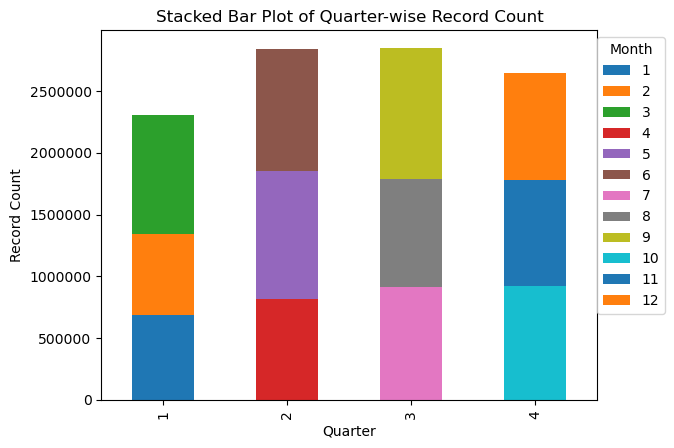

In [10]:
# Create a custom color palette for each month within a quarter
palette = sns.color_palette("tab10", n_colors=12)  # Use n_colors=12 for 12 months

# Pivot the DataFrame to have months as columns for stacking
stacked_df = month_rank_df.pivot(index='quarter', columns='month', values='record_count')

# Bar plot with stacked bars for each quarter and different colors for months
plt.figure(figsize=(12, 6))
ax = stacked_df.plot(kind='bar', stacked=True, color=palette)
plt.title('Stacked Bar Plot of Quarter-wise Record Count')
plt.xlabel('Quarter')
plt.ylabel('Record Count')
plt.legend(title='Month', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation on y-axis
plt.show()


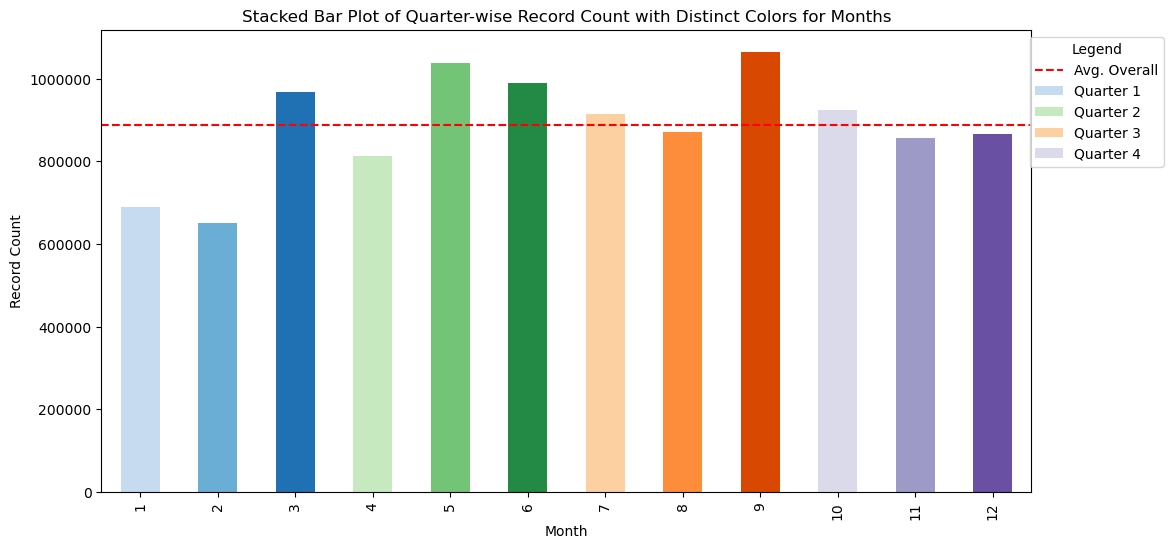

In [11]:
# Define custom color palettes for each quarter
colors_first_quarter = sns.color_palette("Blues", n_colors=3)  # Blue colors for months 1, 2, 3
colors_second_quarter = sns.color_palette("Greens", n_colors=3)  # Green colors for months 4, 5, 6
colors_third_quarter = sns.color_palette("Oranges", n_colors=3)  # Orange colors for months 7, 8, 9
colors_fourth_quarter = sns.color_palette("Purples", n_colors=3)  # Purple colors for months 10, 11, 12

# Pivot the DataFrame to have months as columns for stacking
stacked_df = month_rank_df.pivot(index='quarter', columns='month', values='record_count')

# Create a stacked bar plot with distinct colors for each month within a quarter
plt.figure(figsize=(12, 6))

# Loop through each quarter and plot stacked bars with the custom color palette
quarters = stacked_df.index
for quarter, color_palette in zip(quarters, [colors_first_quarter, colors_second_quarter, colors_third_quarter, colors_fourth_quarter]):
    quarter_data = stacked_df.loc[quarter]
    quarter_data.plot(kind='bar', stacked=True, color=color_palette, label=f'Quarter {quarter}')

# Calculate the overall average for all values
overall_average = stacked_df.stack().mean()

# Plot a red horizontal line for the overall average
plt.axhline(y=overall_average, color='red', linestyle='--', label=f'Avg. Overall')

plt.title('Stacked Bar Plot of Quarter-wise Record Count with Distinct Colors for Months')
plt.xlabel('Month')
plt.ylabel('Record Count')
plt.legend(title='Legend', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation on y-axis
plt.show()


### Hours (not any longer in dataframe)

Hourly Period Counts

In [12]:
# SQL query
query = f"""
    SELECT
      CASE
        WHEN EXTRACT(HOUR FROM hour) BETWEEN 0 AND 6 THEN 'Dawn'
        WHEN EXTRACT(HOUR FROM hour) BETWEEN 7 AND 12 THEN 'Morning'
        WHEN EXTRACT(HOUR FROM hour) BETWEEN 13 AND 18 THEN 'Afternoon'
        ELSE 'Night'
      END AS period,
      COUNT(*) AS record_count
    FROM `{mobile_data_cleaned}`
    GROUP BY 1
    ORDER BY 2 DESC
    """
# DataFrame name
df_name = "hourly_period_counts"

# Execute the query and store the result in the DataFrame
hourly_period_counts = query_df(query, df_name)

hourly_period_counts

Query: 


    SELECT
      CASE
        WHEN EXTRACT(HOUR FROM hour) BETWEEN 0 AND 6 THEN 'Dawn'
        WHEN EXTRACT(HOUR FROM hour) BETWEEN 7 AND 12 THEN 'Morning'
        WHEN EXTRACT(HOUR FROM hour) BETWEEN 13 AND 18 THEN 'Afternoon'
        ELSE 'Night'
      END AS period,
      COUNT(*) AS record_count
    FROM `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.mobile_data_2015_2017_cleaned`
    GROUP BY 1
    ORDER BY 2 DESC
    


Dataframe: **hourly_period_counts**

,period,record_count
0,Afternoon,4081953
1,Morning,3915482
2,Night,2172213
3,Dawn,474258


In [34]:
import plotly.express as px

# Define the custom order and colors
custom_order = ["Dawn", "Morning", "Afternoon", "Night"]

# Create an interactive pie chart with Plotly
fig = px.pie(hourly_period_counts, values='record_count', names='period', 
             title='Hourly Period Counts', 
             hover_data=['record_count'], 
             labels={'record_count': 'Record Count'},
             category_orders={"period": custom_order})

# Customize the layout (optional)
fig.update_traces(textinfo='percent+label', pull=[0.1, 0.1, 0.1, 0.1])

# Show the chart
fig.show()

# Save the plot as an HTML file in the 'Python Plots' folder
plot_file_path = "Python Plots/hourly_period_counts.html"
fig.write_html(plot_file_path)

[View the Plot](./Python%20Plots/hourly_period_counts.html)

### Towns and Province activity

Top 50 Towns with the Highest Mobile Activity Recorded

In [14]:
# SQL query
query = f"""
    SELECT
      postal_code,
      town_name,
      COUNT(*) AS record_count
    FROM
      `{mobile_data_cleaned}`
    WHERE postal_code IS NOT NULL
    GROUP BY postal_code, town_name
    ORDER BY 3 DESC
    LIMIT 50
    """
# DataFrame name
df_name = "hourly_period_counts"

# Execute the query and store the result in the DataFrame
query_df(query, df_name)

Query: 


    SELECT
      postal_code,
      town_name,
      COUNT(*) AS record_count
    FROM
      `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.mobile_data_2015_2017_cleaned`
    WHERE postal_code IS NOT NULL
    GROUP BY postal_code, town_name
    ORDER BY 3 DESC
    LIMIT 50
    


Dataframe: **hourly_period_counts**

,postal_code,town_name,record_count
0,080193,Barcelona,2094147
1,251207,Lleida,275253
2,431233,Reus,230108
3,081017,l'Hospitalet de Llobregat,223375
4,082055,Sant Cugat del Vallès,218380
5,170792,Girona,174102
6,080155,Badalona,169795
7,081878,Sabadell,139425
8,082798,Terrassa,124859
9,083054,Vilafranca del Penedès,124369


In [15]:
# SQL query
query = f"""
WITH ProvinceActivity AS (
  SELECT
      CASE
        WHEN LEFT(CAST(postal_code AS STRING), 2) = '08' THEN 'Barcelona'
        WHEN LEFT(CAST(postal_code AS STRING), 2) = '25' THEN 'Lleida'
        WHEN LEFT(CAST(postal_code AS STRING), 2) = '17' THEN 'Girona'
        WHEN LEFT(CAST(postal_code AS STRING), 2) = '43' THEN 'Tarragona'
        ELSE 'Not defined'
      END AS province,
      COUNT(*) AS record_count
  FROM `{mobile_data_cleaned}`
  GROUP BY province
)

SELECT
    province,
    record_count,
    ROUND((record_count / SUM(record_count) OVER ()) * 100,2) AS percentage
FROM ProvinceActivity
ORDER BY 2 DESC;
    """
# DataFrame name
df_name = "hourly_period_counts"

# Execute the query and store the result in the DataFrame
query_df(query, df_name)

Query: 


WITH ProvinceActivity AS (
  SELECT
      CASE
        WHEN LEFT(CAST(postal_code AS STRING), 2) = '08' THEN 'Barcelona'
        WHEN LEFT(CAST(postal_code AS STRING), 2) = '25' THEN 'Lleida'
        WHEN LEFT(CAST(postal_code AS STRING), 2) = '17' THEN 'Girona'
        WHEN LEFT(CAST(postal_code AS STRING), 2) = '43' THEN 'Tarragona'
        ELSE 'Not defined'
      END AS province,
      COUNT(*) AS record_count
  FROM `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.mobile_data_2015_2017_cleaned`
  GROUP BY province
)

SELECT
    province,
    record_count,
    ROUND((record_count / SUM(record_count) OVER ()) * 100,2) AS percentage
FROM ProvinceActivity
ORDER BY 2 DESC;
    


Dataframe: **hourly_period_counts**

,province,record_count,percentage
0,Barcelona,7282814,68.42
1,Girona,1375692,12.92
2,Lleida,994612,9.34
3,Tarragona,990788,9.31


### Network, operators and signal

In [16]:
# SQL query
query = f"""
SELECT
  network,
  operator,
  COUNT(*) record_count,
  ROUND(AVG(signal),1) avg_netw_signal
FROM
  `{mobile_data_cleaned}`
GROUP BY 1,2
ORDER BY 3 DESC;
    """
# DataFrame name
df_name = "netw_oper_signal"

# Execute the query and store the result in the DataFrame
netw_oper_signal = query_df(query, df_name)

netw_oper_signal

Query: 


SELECT
  network,
  operator,
  COUNT(*) record_count,
  ROUND(AVG(signal),1) avg_netw_signal
FROM
  `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.mobile_data_2015_2017_cleaned`
GROUP BY 1,2
ORDER BY 3 DESC;
    


Dataframe: **netw_oper_signal**

,network,operator,record_count,avg_netw_signal
0,Movistar,Movistar,4205030,12.9
1,Vodafone,Vodafone,2637269,13.9
2,Orange,Orange,2003502,13.3
3,Orange,Jazztel,415882,12.6
4,Movistar,Pepephone,372329,12.9
...,...,...,...,...
65,simyo 3G,simyo 3G,5,19.0
66,eticom,eticom,4,17.0
67,DEFACE,DEFACE,2,20.5
68,Orange,eticom,2,8.0


In [17]:
networks = netw_oper_signal['network'].nunique()
operators = netw_oper_signal['operator'].nunique()

display(Markdown(f"There are {networks} unique networks and {operators} distinct operators"))

There are 52 unique networks and 59 distinct operators

Which (national) network has the highest activity recorded?

In [18]:
# Group the DataFrame by the "network" column and calculate the total activity
network_activity = netw_oper_signal.groupby('network')['record_count'].sum().reset_index()

# Find the network with the highest total activity
max_activity_network = network_activity[network_activity['record_count'] == network_activity['record_count'].max()]

# Print the network with the highest total activity
max_activity_network

,network,record_count
26,Movistar,4664008


And the operator?

In [19]:
# Group the DataFrame by the "operator" column and calculate the total activity
operator_activity = netw_oper_signal.groupby('operator')['record_count'].sum().reset_index()

# Find the operator with the highest total activity
max_activity_operator = operator_activity[operator_activity['record_count'] == operator_activity['record_count'].max()]

# Print the operator with the highest total activity
max_activity_operator

,operator,record_count
27,Movistar,4205030


Which network/operator has the highest average signal?

In [20]:
# Find the index of the row with the maximum "avg_netw_signal"
max_signal_index = netw_oper_signal['avg_netw_signal'].idxmax()

# Retrieve the corresponding row with the maximum "avg_netw_signal"
top_signal = netw_oper_signal.loc[max_signal_index]

# Display the row with the maximum "avg_netw_signal"
top_signal

network            DEFACE
operator           DEFACE
record_count            2
avg_netw_signal      20.5
Name: 67, dtype: object

Which network/operator has the highest average signal among the top 25% of recorded activities?

In [21]:
# Calculate the threshold for the top 25% percentile of "record_count"
threshold = netw_oper_signal['record_count'].quantile(0.75)

# Filter the DataFrame to select rows with "record_count" greater than or equal to the threshold
top_25_percentile = netw_oper_signal[netw_oper_signal['record_count'] >= threshold]

# Find the row with the maximum "avg_netw_signal" within the filtered DataFrame
max_avg_netw_signal_row = top_25_percentile.loc[top_25_percentile['avg_netw_signal'].idxmax()]

# Display the row with the maximum "avg_netw_signal"
max_avg_netw_signal_row

network            Movistar
operator                ONO
record_count          44287
avg_netw_signal        14.6
Name: 9, dtype: object

Top Signal Strength by Operator and Network (top 10% record_count, excluding null values)

In [26]:
# SQL query
query = f"""
WITH Top10Percent AS (
  
  # Subquery to prepare data to calculate the number of operators for each network
  SELECT
    network,
    num_operator,
    record_count,
    RANK() OVER (ORDER BY record_count DESC) AS record_count_rank,
    avg_signal,
    quartile
  FROM (
    SELECT
      LOWER(network) AS network,
      
      # Calculate the number of distinct operators for each network
      COUNT(DISTINCT LOWER(operator)) AS num_operator,
      
      COUNT(*) AS record_count,
      ROUND(AVG(signal), 1) AS avg_signal,
      NTILE(10) OVER (ORDER BY COUNT(*) DESC) AS quartile
    FROM
      `{mobile_data_cleaned}`
    WHERE
    
    # Exclude rows with network 'null' (stored as string)
      network != 'null'
    GROUP BY 1
  )
)

SELECT
  network,
  num_operator,
  record_count,
  record_count_rank,
  avg_signal
FROM
  Top10Percent
WHERE
  quartile = 1
ORDER BY
  avg_signal DESC;
    """
# DataFrame name
df_name = "net_oper_signal"

# Execute the query and store the result in the DataFrame
query_df(query, df_name)

Query: 


WITH Top10Percent AS (
  
  # Subquery to prepare data to calculate the number of operators for each network
  SELECT
    network,
    num_operator,
    record_count,
    RANK() OVER (ORDER BY record_count DESC) AS record_count_rank,
    avg_signal,
    quartile
  FROM (
    SELECT
      LOWER(network) AS network,
      
      # Calculate the number of distinct operators for each network
      COUNT(DISTINCT LOWER(operator)) AS num_operator,
      
      COUNT(*) AS record_count,
      ROUND(AVG(signal), 1) AS avg_signal,
      NTILE(10) OVER (ORDER BY COUNT(*) DESC) AS quartile
    FROM
      `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.mobile_data_2015_2017_cleaned`
    WHERE
    
    # Exclude rows with network 'null' (stored as string)
      network != 'null'
    GROUP BY 1
  )
)

SELECT
  network,
  num_operator,
  record_count,
  record_count_rank,
  avg_signal
FROM
  Top10Percent
WHERE
  quartile = 1
ORDER BY
  avg_signal DESC;
    


Dataframe: **net_oper_signal**

,network,num_operator,record_count,record_count_rank,avg_signal
0,vodafone,4,2649062,3,13.9
1,orange,11,2774733,2,13.2
2,yoigo,1,357913,4,13.0
3,movistar,5,4664008,1,12.9
4,jazztel,1,28351,6,11.9
5,eroski movil,1,39871,5,11.0


Top Network and Operator by Record Count for Each Province

In [31]:
# SQL query
query = f"""
WITH ProvinceActivity AS (
  SELECT
    CASE
      WHEN LEFT(CAST(postal_code AS STRING), 2) = '08' THEN 'Barcelona'
      WHEN LEFT(CAST(postal_code AS STRING), 2) = '25' THEN 'Lleida'
      WHEN LEFT(CAST(postal_code AS STRING), 2) = '17' THEN 'Girona'
      WHEN LEFT(CAST(postal_code AS STRING), 2) = '43' THEN 'Tarragona'
      ELSE 'Not defined'
    END AS province,
    LOWER(network) AS network,
    LOWER(operator) AS operator,
    COUNT(*) AS record_count
  FROM `{mobile_data_cleaned}`
  GROUP BY province, network, operator
)

# Find the Rank of Network and Operator by Record Count for Each Province
, RankedNetwork AS (
  SELECT
    province,
    network,
    operator,
    record_count,
    RANK() OVER (PARTITION BY province ORDER BY record_count DESC) AS network_rank
  FROM ProvinceActivity
)

, RankedOperator AS (
  SELECT
    province,
    network,
    operator,
    record_count,
    RANK() OVER (PARTITION BY province ORDER BY record_count DESC) AS operator_rank
  FROM ProvinceActivity
)

# Select the Top Network and Top Operator for Each Province
SELECT
  p.province,
  n.network AS top_network,
  o.operator AS top_operator
  #n.record_count AS network_record_count,
  #o.record_count AS operator_record_count
FROM RankedNetwork n
JOIN RankedOperator o ON n.province = o.province AND n.network_rank = 1 AND o.operator_rank = 1
JOIN (SELECT DISTINCT province FROM ProvinceActivity) p ON n.province = p.province
ORDER BY p.province;
    """
# DataFrame name
df_name = "top_net_and_ope_by_province"

# Execute the query and store the result in the DataFrame
query_df(query, df_name)

Query: 


WITH ProvinceActivity AS (
  SELECT
    CASE
      WHEN LEFT(CAST(postal_code AS STRING), 2) = '08' THEN 'Barcelona'
      WHEN LEFT(CAST(postal_code AS STRING), 2) = '25' THEN 'Lleida'
      WHEN LEFT(CAST(postal_code AS STRING), 2) = '17' THEN 'Girona'
      WHEN LEFT(CAST(postal_code AS STRING), 2) = '43' THEN 'Tarragona'
      ELSE 'Not defined'
    END AS province,
    LOWER(network) AS network,
    LOWER(operator) AS operator,
    COUNT(*) AS record_count
  FROM `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.mobile_data_2015_2017_cleaned`
  GROUP BY province, network, operator
)

# Find the Rank of Network and Operator by Record Count for Each Province
, RankedNetwork AS (
  SELECT
    province,
    network,
    operator,
    record_count,
    RANK() OVER (PARTITION BY province ORDER BY record_count DESC) AS network_rank
  FROM ProvinceActivity
)

, RankedOperator AS (
  SELECT
    province,
    network,
    operator,
    record_count,
    RANK() OVER (PARTITION BY pro

Dataframe: **top_net_and_ope_by_province**

,province,top_network,top_operator
0,Barcelona,movistar,movistar
1,Girona,movistar,movistar
2,Lleida,movistar,movistar
3,Tarragona,movistar,movistar


### Description and activity

Description:
    
    - STATE_IN_SERVICE (0),
    - STATE_OUT_OF_SERVICE (1),
    - STATE_EMERGENCY_ONLY (2),
    - STATE_POWER_OFF (3)
    
User Activity:

    - IN_VEHICLE
    - STILL
    - ON_FOOT
    - TILTING
    - UNKNOWN
    - ON_BICYCLE

Activity Rank by Description with Overall Rank

In [30]:
# SQL query
query = f"""
# Activity Rank by Description with Overall Rank
WITH ActivityRank AS (
  SELECT
    description,
    activity,
    RANK() OVER (PARTITION BY description ORDER BY COUNT(*) DESC) AS rank_by_description,
    COUNT(*) AS record_count
  FROM
    `{mobile_data_cleaned}`
  GROUP BY 1, 2
)

SELECT
  description,
  activity,
  rank_by_description,
  #record_count,
  RANK() OVER (ORDER BY rank_by_description, record_count DESC) AS overall_rank
FROM ActivityRank
ORDER BY 1, 4 ASC;
    """
# DataFrame name
df_name = "descr_act_rank"

# Execute the query and store the result in the DataFrame
query_df(query, df_name)

Query: 


# Activity Rank by Description with Overall Rank
WITH ActivityRank AS (
  SELECT
    description,
    activity,
    RANK() OVER (PARTITION BY description ORDER BY COUNT(*) DESC) AS rank_by_description,
    COUNT(*) AS record_count
  FROM
    `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.mobile_data_2015_2017_cleaned`
  GROUP BY 1, 2
)

SELECT
  description,
  activity,
  rank_by_description,
  #record_count,
  RANK() OVER (ORDER BY rank_by_description, record_count DESC) AS overall_rank
FROM ActivityRank
ORDER BY 1, 4 ASC;
    


Dataframe: **descr_act_rank**

,description,activity,rank_by_description,overall_rank
0,STATE_EMERGENCY_ONLY,IN_VEHICLE,1,1
1,STATE_EMERGENCY_ONLY,ON_FOOT,2,5
2,STATE_EMERGENCY_ONLY,STILL,3,9
3,STATE_EMERGENCY_ONLY,TILTING,4,13
4,STATE_EMERGENCY_ONLY,UNKNOWN,5,17
5,STATE_EMERGENCY_ONLY,ON_BICYCLE,6,21
6,STATE_IN_SERVICE,STILL,1,2
7,STATE_IN_SERVICE,IN_VEHICLE,2,6
8,STATE_IN_SERVICE,TILTING,3,10
9,STATE_IN_SERVICE,ON_FOOT,4,14


Calculate activity rank by description and activity, including most frequent town and overall rank

In [32]:
# SQL query
query = f"""
# Subquery to calculate the rank of activities by description
WITH ActivityRank AS (
  SELECT
    description,
    activity,
    RANK() OVER (PARTITION BY description ORDER BY COUNT(*) DESC) AS rank_by_description,
    COUNT(*) AS record_count
  FROM
    `bigquery-public-data.catalonian_mobile_coverage_eu.mobile_data_2015_2017`
  GROUP BY description, activity
),

# Subquery to find the most frequent town for each unique pair of description and activity
MostFrequentTown AS (
  SELECT
    description,
    activity,
    town_name,
    RANK() OVER (PARTITION BY description, activity ORDER BY COUNT(*) DESC) AS town_rank
  FROM
    `{mobile_data_cleaned}`
  GROUP BY description, activity, town_name
)

# Main query to combine the results and calculate overall rank
SELECT
  ar.description,
  ar.activity,
  ar.rank_by_description,
  RANK() OVER (ORDER BY ar.rank_by_description, ar.record_count DESC) AS overall_rank,
  mft.town_name AS most_frequent_town
FROM ActivityRank ar
# Join with the MostFrequentTown subquery to include the most frequent town
JOIN MostFrequentTown mft ON ar.description = mft.description AND ar.activity = mft.activity
# Filter for the most frequent town
WHERE mft.town_rank = 1 
ORDER BY 1, 3 ASC;
    """
# DataFrame name
df_name = "descr_act_rank"

# Execute the query and store the result in the DataFrame
query_df(query, df_name)

Query: 


# Subquery to calculate the rank of activities by description
WITH ActivityRank AS (
  SELECT
    description,
    activity,
    RANK() OVER (PARTITION BY description ORDER BY COUNT(*) DESC) AS rank_by_description,
    COUNT(*) AS record_count
  FROM
    `bigquery-public-data.catalonian_mobile_coverage_eu.mobile_data_2015_2017`
  GROUP BY description, activity
),

# Subquery to find the most frequent town for each unique pair of description and activity
MostFrequentTown AS (
  SELECT
    description,
    activity,
    town_name,
    RANK() OVER (PARTITION BY description, activity ORDER BY COUNT(*) DESC) AS town_rank
  FROM
    `bq-analyst-230590.project_cat_mobile_coverage_2015_2017.mobile_data_2015_2017_cleaned`
  GROUP BY description, activity, town_name
)

# Main query to combine the results and calculate overall rank
SELECT
  ar.description,
  ar.activity,
  ar.rank_by_description,
  RANK() OVER (ORDER BY ar.rank_by_description, ar.record_count DESC) AS overall_rank,
  mft.town_na

Dataframe: **descr_act_rank**

,description,activity,rank_by_description,overall_rank,most_frequent_town
0,STATE_EMERGENCY_ONLY,IN_VEHICLE,1,1,Barcelona
1,STATE_EMERGENCY_ONLY,ON_FOOT,2,5,Barcelona
2,STATE_EMERGENCY_ONLY,STILL,3,9,Barcelona
3,STATE_EMERGENCY_ONLY,TILTING,4,13,Barcelona
4,STATE_EMERGENCY_ONLY,UNKNOWN,5,17,Barcelona
5,STATE_EMERGENCY_ONLY,ON_BICYCLE,6,23,Barcelona
6,STATE_IN_SERVICE,STILL,1,2,Barcelona
7,STATE_IN_SERVICE,IN_VEHICLE,2,6,Barcelona
8,STATE_IN_SERVICE,TILTING,3,10,Barcelona
9,STATE_IN_SERVICE,ON_FOOT,4,14,Barcelona
